# Dataset visualization

In [147]:
from src.yaae.engine import Node
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

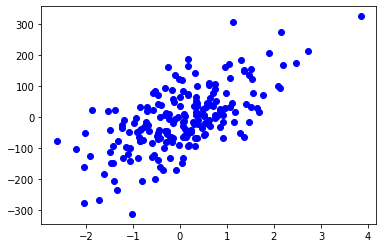

In [148]:
x, y = make_regression(n_samples=200, n_features=3, noise=10, random_state=42)
plt.scatter(x[:, 0], y, color='blue')     

# Model initialization

In [149]:
X = Node(x, requires_grad=False)
y_true = Node(y, requires_grad=False)
W = Node(np.random.randn(3), requires_grad=True)
b = Node(np.random.randn(1), requires_grad=True)

# Model training

In [150]:
EPOCH = 100
lr = 0.01

for epoch in range(EPOCH+1):
    W.zero_grad()
    b.zero_grad()
    y_pred = X.matmul(W) + b
    errors = y_pred - y_true
    loss = (errors * errors).sum(keepdims=False) / EPOCH
    loss.backward()
    W -= lr * W.grad.data 
    b -= lr * b.grad.data
    if epoch % 20 == 0:
        print(f"Epoch {epoch}: train-loss: {loss.data}")

# Compute R2 score.
y_bar = np.average(y_true.data)
SStot = np.sum((y_true.data - y_bar)**2)
SSres = np.sum((y_true.data - y_pred.data)**2)
r2 = 1 - (SSres/SStot)

print(f"\nr2 score: {r2}")

Epoch 0: train-loss: 19618.378426404375
Epoch 20: train-loss: 4503.120247373166
Epoch 40: train-loss: 1177.8119934557267
Epoch 60: train-loss: 435.1341110435105
Epoch 80: train-loss: 267.14132839642923
Epoch 100: train-loss: 228.72185903662572

r2 score: 0.9887691742558894


# Result visualization

In [151]:
single_class_pred = X.data[:, 0] * W.data[0] + b.data

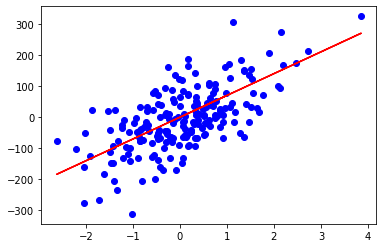

In [152]:
plt.scatter(x[:, 0], y, color='blue')
plt.plot(x[:, 0], single_class_pred, color='red')
plt.show()